<a href="https://colab.research.google.com/github/2241031c/Night-Lights-Dissertation/blob/main/NL_1_7_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script performs a Moran's I test and displays the output as a chart of small multiples displaying the Moran's statistic and p-value on the plot.

I have set it up to run for two locations- the scripts are identical just with different links/names.
Only run for one location then restart session to avoid re-using variable names.

This script also pulls data from drive however could be modified to pull from Earthengine.

In [ ]:
#Install requires libraries
!pip install libpysal
!pip install pysal
!pip install splot
!pip install rasterio

In [ ]:
#Import libraries
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import rasterio
from rasterio.features import shapes
import geopandas as gpd
import os
import splot
from google.colab import drive

import os
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
import numpy as np
import pandas as pd
import rasterio
from rasterio.features import shapes
import geopandas as gpd
from esda.moran import Moran, Moran_Local
from splot.esda import moran_scatterplot

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Tomintoul

In [ ]:
!pip install -U esda

<ipython-input-51-d98655651530>:39: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)
<ipython-input-51-d98655651530>:39: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)
<ipython-input-51-d98655651530>:39: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)
<ipython-input-51-d98655651530>:39: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)
<ipython-input-51-d98655651530>:39: FutureWarning: `use_index` defaults to False but will default to True in

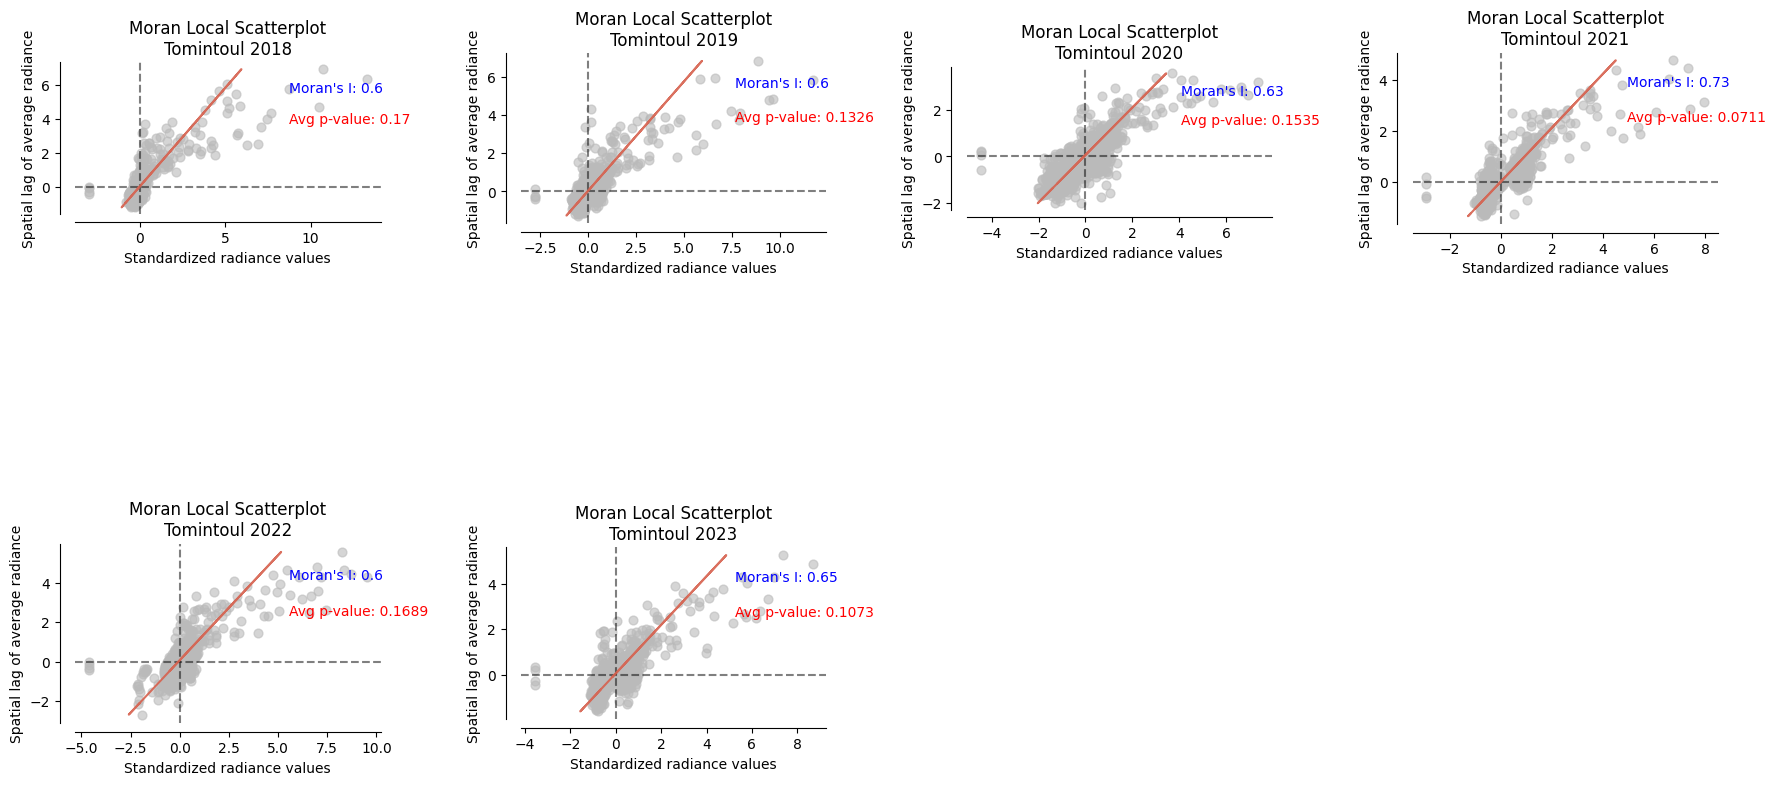

In [ ]:
import os
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.features import shapes
from libpysal.weights.contiguity import Queen
from esda.moran import Moran_Local # Import Moran_Local from the correct module
from splot.esda import moran_scatterplot

# Set up the figure and axes for the small multiples
fig, axes = plt.subplots(3, 4, figsize=(18, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# List to hold p-values for each year
p_values_by_year = []

for i, year in enumerate(range(2018, 2024)):  # Loop from 2014 to 2023
    link_to_data = f'/content/drive/MyDrive/EarthEngineExports/VIIRS_Tomintoul_{year}.tif' #edit for data location
    if os.path.exists(link_to_data):
        src = rasterio.open(link_to_data)
        raster_array = src.read(1)
        transform = src.transform

        results = (
            {'properties': {'value': v}, 'geometry': s}
            for i, (s, v)
            in enumerate(
                shapes(raster_array, transform=transform)
            )
        )

        gdf = gpd.GeoDataFrame.from_features(list(results), crs=src.crs)
        gdf['value'] = gdf['value'].fillna(0)

        #Define values for Moran's I
        y = gdf['value'].values
        w = Queen.from_dataframe(gdf)
        w.transform = 'r'

        moran_loc = Moran_Local(y, w)
        moran_scatterplot(moran_loc, aspect_equal=True, ax=axes[i])
        moran_i = round(moran_loc.Is.mean(), 2)  # Calculate the average of the local Moran's I values and round it

        # Calculate the average p-value for the current year
        average_p_value = round(moran_loc.p_sim.mean(), 4)
        p_values_by_year.append(average_p_value)

        # Set title and labels
        axes[i].set_title(f'Moran Local Scatterplot\nTomintoul {year}')
        axes[i].set_xlabel('Standardized radiance values')
        axes[i].set_ylabel('Spatial lag of average radiance')

        # Annotate with Moran's I and average p-value
        axes[i].annotate(f'Moran\'s I: {moran_i}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=10, color='blue')
        axes[i].annotate(f'Avg p-value: {average_p_value}', xy=(0.7, 0.6), xycoords='axes fraction', fontsize=10, color='red')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
#plt.savefig('enter_save_location')
plt.show()


#Galloway

<ipython-input-50-c5b71acbd89e>:39: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)
<ipython-input-50-c5b71acbd89e>:39: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)
<ipython-input-50-c5b71acbd89e>:39: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)
<ipython-input-50-c5b71acbd89e>:39: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)
<ipython-input-50-c5b71acbd89e>:39: FutureWarning: `use_index` defaults to False but will default to True in

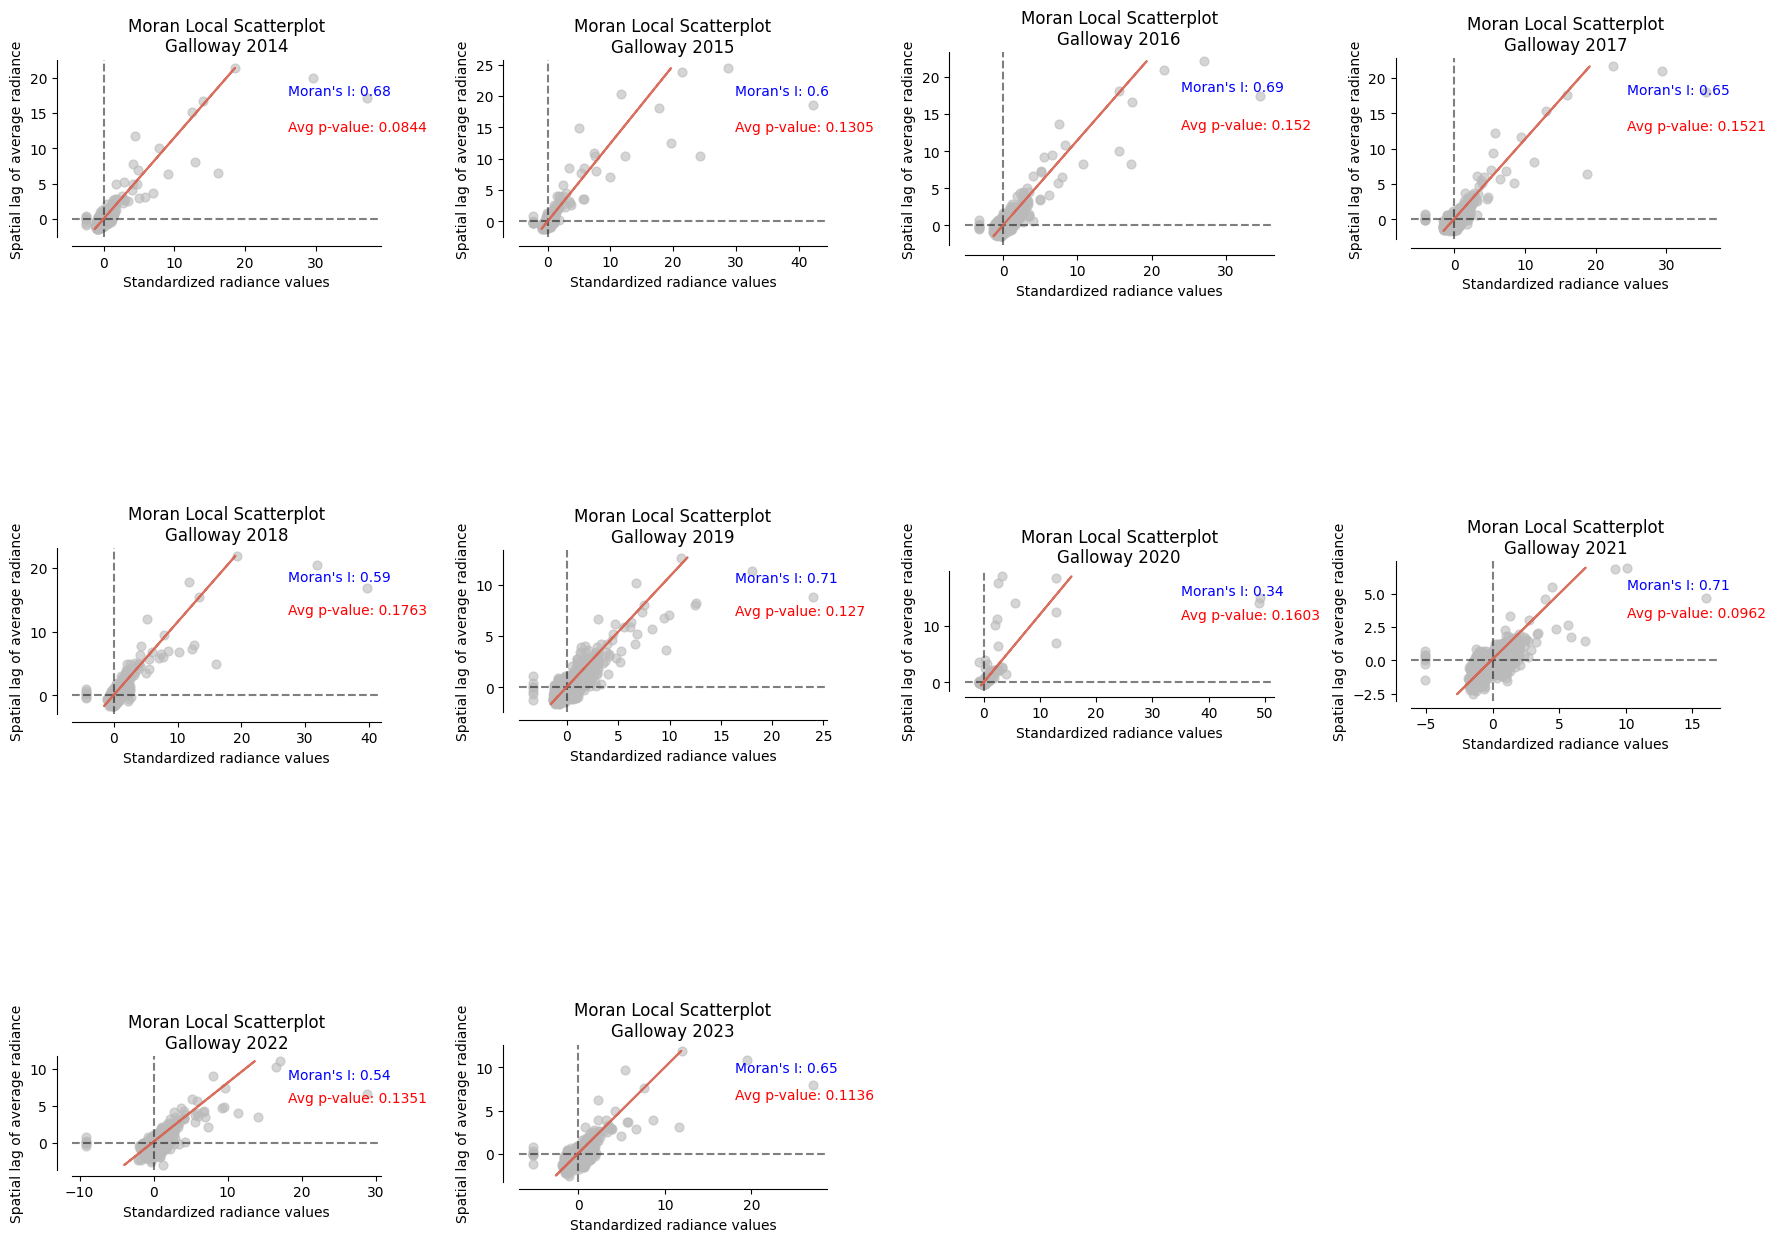

In [ ]:
import os
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.features import shapes
from libpysal.weights.contiguity import Queen
from esda.moran import Moran_Local # Import Moran_Local from the correct module
from splot.esda import moran_scatterplot

# Set up the figure and axes for the small multiples
fig, axes = plt.subplots(3, 4, figsize=(18, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# List to hold p-values for each year
p_values_by_year = []

for i, year in enumerate(range(2014, 2024)):  # Loop from 2014 to 2023
    link_to_data = f'/content/drive/MyDrive/EarthEngineExports/VIIRS_Galloway_{year}.tif' #edit for link to data
    if os.path.exists(link_to_data):
        src = rasterio.open(link_to_data)
        raster_array = src.read(1)
        transform = src.transform

        results = (
            {'properties': {'value': v}, 'geometry': s}
            for i, (s, v)
            in enumerate(
                shapes(raster_array, transform=transform)
            )
        )

        gdf = gpd.GeoDataFrame.from_features(list(results), crs=src.crs)
        gdf['value'] = gdf['value'].fillna(0)

        #Define values for Moran's I
        y = gdf['value'].values
        w = Queen.from_dataframe(gdf)
        w.transform = 'r'

        moran_loc = Moran_Local(y, w)
        moran_scatterplot(moran_loc, aspect_equal=True, ax=axes[i])
        moran_i = round(moran_loc.Is.mean(), 2)  # Calculate the average of the local Moran's I values and round it

        # Calculate the average p-value for the current year
        average_p_value = round(moran_loc.p_sim.mean(), 4)
        p_values_by_year.append(average_p_value)

        # Set title and labels
        axes[i].set_title(f'Moran Local Scatterplot\nGalloway {year}')
        axes[i].set_xlabel('Standardized radiance values')
        axes[i].set_ylabel('Spatial lag of average radiance')

        # Annotate with Moran's I and average p-value
        axes[i].annotate(f'Moran\'s I: {moran_i}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=10, color='blue')
        axes[i].annotate(f'Avg p-value: {average_p_value}', xy=(0.7, 0.6), xycoords='axes fraction', fontsize=10, color='red')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
#plt.savefig('enter save lovation')
plt.show()